<a href="https://colab.research.google.com/github/Deepa018-coder/ML_ANN_4749.ipynb/blob/main/ML_ANN_4749.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaleido

In [ ]:
# Install XGBoost if not already installed
!pip install xgboost

In [ ]:
import pandas as pd

# 1. Load the dataset
df = pd.read_csv('/content/dataset_descriptor2 (1).csv')

# 2. Drop any rows with missing values
df = df.dropna()  # no argument needed here

# 3. Quick look at the first rows
print(df.head())

                  Name  PubchemFP0  PubchemFP1  PubchemFP2  PubchemFP3  \
0  AUTOGEN_molecule2_1         1.0         1.0         1.0         0.0   
1  AUTOGEN_molecule2_2         1.0         1.0         1.0         0.0   
2  AUTOGEN_molecule2_3         1.0         1.0         1.0         1.0   
3  AUTOGEN_molecule2_4         1.0         1.0         1.0         0.0   
4  AUTOGEN_molecule2_5         1.0         1.0         1.0         0.0   

   PubchemFP4  PubchemFP5  PubchemFP6  PubchemFP7  PubchemFP8  ...  \
0         0.0         0.0         0.0         0.0         0.0  ...   
1         0.0         0.0         0.0         0.0         0.0  ...   
2         0.0         0.0         0.0         0.0         0.0  ...   
3         0.0         0.0         0.0         0.0         0.0  ...   
4         0.0         0.0         0.0         0.0         0.0  ...   

   PubchemFP876  PubchemFP877  PubchemFP878  PubchemFP879  PubchemFP880  \
0           0.0           0.0           0.0           0.0  

In [ ]:
#🧹 Step 3: Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assume 'Active' is the target
X = df.drop(columns=['LogS', 'Name'])
y = df['LogS']

# Split into training/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#🤖 Step 4: Train Multiple ML Models
#We'll compare: Logistic Regression, Random Forest, SVM, and XGBoost.

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

In [ ]:
#🤖 Step 4: Train Multiple ML Models
#We'll compare: Linear Regression, Random Forest Regressor, SVM Regressor, and XGBoost Regressor.

from sklearn.linear_model import LinearRegression  # Import Linear Regression
from sklearn.ensemble import RandomForestRegressor # Import RandomForestRegressor
from sklearn.svm import SVR                      # Import SVR
from xgboost import XGBRegressor                # Import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score # Import regression metrics


# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "SVM": SVR(),
    "XGBoost": XGBRegressor()
}

# Train and evaluate
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    # Use regression metrics
    mse = mean_squared_error(y_test, preds)
    r2 = r2_score(y_test, preds)

    results[name] = {'MSE': mse, 'R2': r2}
    print(f"\n{name} MSE: {mse:.2f}, R2: {r2:.2f}")


Linear Regression MSE: 0.00, R2: 1.00

Random Forest MSE: 0.02, R2: 0.99

SVM MSE: 0.16, R2: 0.93

XGBoost MSE: 0.03, R2: 0.99


In [ ]:
# Predictions
y_pred_lr = models['Linear Regression'].predict(X_test)
y_pred_rf = models['Random Forest'].predict(X_test)
y_pred_svr = models['SVM'].predict(X_test)  # Use X_test here, scaling was done during training
y_pred_xgb = models['XGBoost'].predict(X_test)

# R² Scores
r2_lr = r2_score(y_test, y_pred_lr)
r2_rf = r2_score(y_test, y_pred_rf)
r2_svr = r2_score(y_test, y_pred_svr)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Print comparison
print("\nModel Comparison (R² Scores):")
print(f"Linear Regression: {r2_lr:.4f}")
print(f"Random Forest:     {r2_rf:.4f}")
print(f"SVR:               {r2_svr:.4f}")
print(f"XGBoost:           {r2_xgb:.4f}")


Model Comparison (R² Scores):
Linear Regression: 1.0000
Random Forest:     0.9909
SVR:               0.9265
XGBoost:           0.9871


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

# Function to calculate all metrics
def get_metrics(y_true, y_pred):
    return {
        'R²': r2_score(y_true, y_pred),
        'MAE': mean_absolute_error(y_true, y_pred),
        'MSE': mean_squared_error(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred))
    }

# Collect all metrics
metrics = {}
for name, model in models.items():
    # Assuming the predictions are stored in the 'results' dictionary from the previous cell
    # We need to re-run the predictions to get the actual predicted values
    preds = model.predict(X_test)
    metrics[name] = get_metrics(y_test, preds)


# Convert to DataFrame for display
metrics_df = pd.DataFrame(metrics).T  # transpose for nicer layout
metrics_df = metrics_df.round(4)

# Show table
print("\nModel Performance Summary:")
display(metrics_df)


Model Performance Summary:


,R²,MAE,MSE,RMSE
Linear Regression,1.0000,0.0000,0.0000,0.0000
Random Forest,0.9909,0.0621,0.0200,0.1415
SVM,0.9265,0.1863,0.1619,0.4024
XGBoost,0.9871,0.0628,0.0285,0.1687


In [ ]:
metrics_df.to_csv("model_metrics_summary.csv")
# or
metrics_df.to_excel("model_metrics_summary.xlsx")

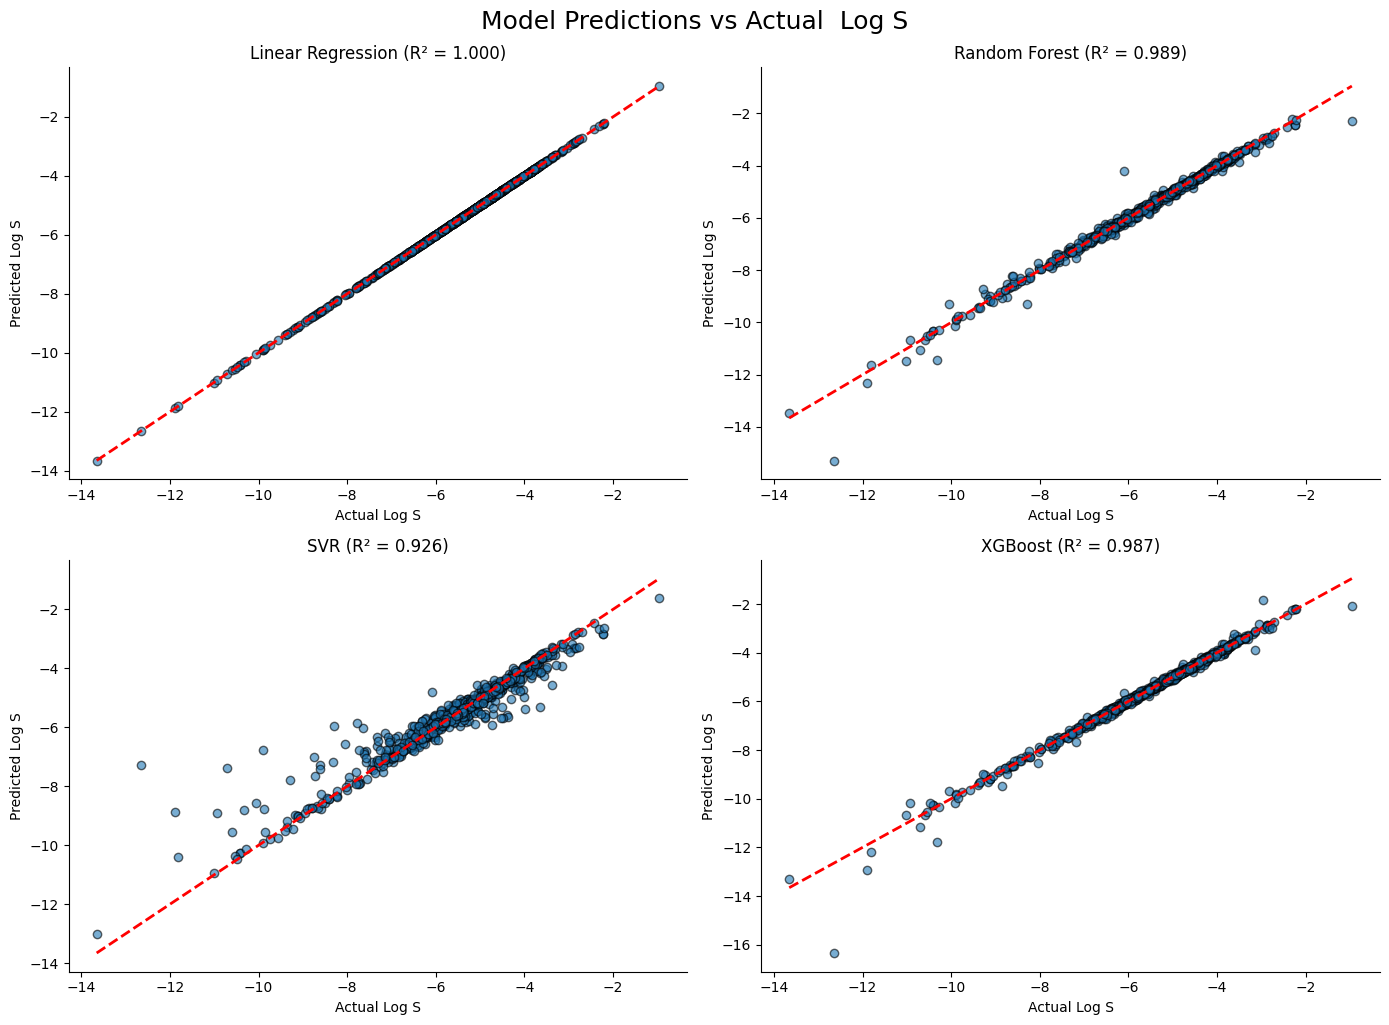

In [ ]:
# === Scatter Plots: Actual vs Predicted ===
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

# Define models (re-defining it here since the previous cell was not executed)
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "SVM": SVR(),
    "XGBoost": XGBRegressor()
}

# Add your data loading and splitting code here to define X_train, X_test, y_train, y_test
# For example:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# df = pd.read_csv('your_data.csv')
# X = df[['feature1', 'feature2']] # Your features
# y = df['target'] # Your target
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train models (re-training here as well)
for name, model in models.items():
    model.fit(X_train, y_train)


plt.figure(figsize=(14, 10))

# Generate predictions for each model
y_pred_lr = models['Linear Regression'].predict(X_test)
y_pred_rf = models['Random Forest'].predict(X_test)
y_pred_svr = models['SVM'].predict(X_test)
y_pred_xgb = models['XGBoost'].predict(X_test)

models_preds = {
    'Linear Regression': y_pred_lr,
    'Random Forest': y_pred_rf,
    'SVR': y_pred_svr,
    'XGBoost': y_pred_xgb
}

for i, (name, y_pred) in enumerate(models_preds.items(), 1):
    ax = plt.subplot(2, 2, i)
    plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='k')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.title(f'{name} (R² = {r2_score(y_test, y_pred):.3f})')
    plt.xlabel('Actual Log S')
    plt.ylabel('Predicted Log S')

    # Remove grid
    plt.grid(False)

    # Hide all spines
    for spine in ax.spines.values():
        spine.set_visible(False)

    # Show only x and y axis lines
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)


plt.tight_layout()
plt.suptitle('Model Predictions vs Actual  Log S', fontsize=18, y=1.02)
plt.savefig("Model_Predictions_vs_Actual_LogS.png", dpi=300, bbox_inches='tight')
plt.show()

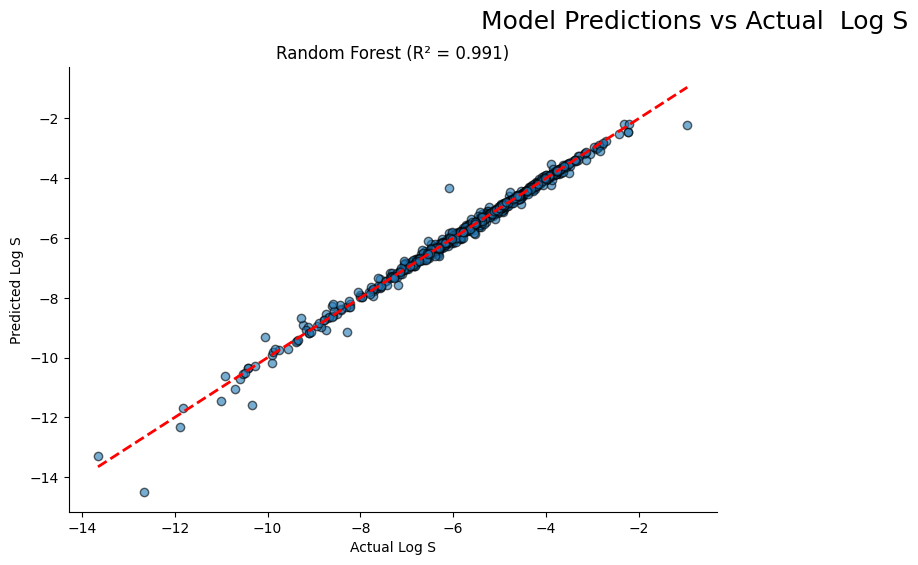

In [ ]:
# === Scatter Plots: Actual vs Predicted ===
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score

# Define models (re-defining it here since the previous cell was not executed)
models = {

    "Random Forest": RandomForestRegressor(),

}

# Add your data loading and splitting code here to define X_train, X_test, y_train, y_test
# For example:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# df = pd.read_csv('your_data.csv')
# X = df[['feature1', 'feature2']] # Your features
# y = df['target'] # Your target
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train models (re-training here as well)
for name, model in models.items():
    model.fit(X_train, y_train)


plt.figure(figsize=(14, 10))

# Generate predictions for each model

y_pred_rf = models['Random Forest'].predict(X_test)


models_preds = {

    'Random Forest': y_pred_rf,

}

for i, (name, y_pred) in enumerate(models_preds.items(), 1):
    ax = plt.subplot(2, 2, i)
    plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='k')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.title(f'{name} (R² = {r2_score(y_test, y_pred):.3f})')
    plt.xlabel('Actual Log S')
    plt.ylabel('Predicted Log S')

    # Remove grid
    plt.grid(False)

    # Hide all spines
    for spine in ax.spines.values():
        spine.set_visible(False)

    # Show only x and y axis lines
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)


plt.tight_layout()
plt.suptitle('Model Predictions vs Actual  Log S', fontsize=18, y=1.02)
plt.savefig("Model_Predictions_vs_Actual_LogS.png", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Add ANN model to the comparison
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define ANN model
# The number of input features should match the number of columns in X_train
input_dim = X_train.shape[1]

ann_model = Sequential()
ann_model.add(Dense(128, input_dim=input_dim, activation='relu')) # Input layer and first hidden layer
ann_model.add(Dense(64, activation='relu')) # Second hidden layer
ann_model.add(Dense(1, activation='linear')) # Output layer for regression

# Compile the model
ann_model.compile(loss='mean_squared_error', optimizer='adam')

# Add ANN model to the models dictionary
models["ANN"] = ann_model

# Train and evaluate ANN model
print("\nTraining and evaluating ANN model...")
ann_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0) # verbose=0 to reduce output during training

preds_ann = ann_model.predict(X_test).flatten() # Flatten predictions to match y_test shape

# Get metrics for ANN model
metrics["ANN"] = get_metrics(y_test, preds_ann)

# Update and display the metrics DataFrame
metrics_df = pd.DataFrame(metrics).T
metrics_df = metrics_df.round(4)

print("\nModel Performance Summary (including ANN):")
display(metrics_df)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training and evaluating ANN model...
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Model Performance Summary (including ANN):


,R²,MAE,MSE,RMSE
Linear Regression,1.0000,0.0000,0.0000,0.0000
Random Forest,0.9909,0.0621,0.0200,0.1415
SVM,0.9265,0.1863,0.1619,0.4024
XGBoost,0.9871,0.0628,0.0285,0.1687
ANN,0.9691,0.1299,0.0681,0.2610
